In [92]:
import matplotlib.pyplot as plt
from typing import List, Dict
import numpy as np
import pandas as pd
import json
import os

In [93]:
DPI=100 # 300

In [94]:
root_directory = os.path.dirname("../")
logs_directory = os.path.join(root_directory, "logs")
logs_to_include = ["logs_2024-05-05T12:49:50"] # Logs to include in the analysis
#logs_to_include = [name for name in os.listdir(logs_directory) if os.path.isdir(os.path.join(logs_directory, name))]

## Goodput

In [95]:
def get_throughput_from_dir(directory: str) -> pd.DataFrame:
    """ Extracts goodput and filesize from the logs in a directory

    :param directory: The directory containing the logs
    :type directory: str
    :return: Returns a DataFrame with columns: filesize, goodput, implementation
    :rtype: pd.DataFrame
    """
    result_json = {}
    # Assuming logs_directory is defined elsewhere in your code
    with open(os.path.join(logs_directory, directory, "result.json")) as f:
        result_json = json.load(f)
    
    df = pd.DataFrame(columns=["throughput", "implementation"])
    data_to_append = [] # Initialize an empty list to store data before appending
    
    for measurement in result_json["measurements"]:
        for measurement_entry in measurement:
            if measurement_entry["name"] == "throughput":
                throughput_runs = measurement_entry["details"]
                implementation = measurement_entry["implementation"]
                
                # Assuming goodput_runs is a list of goodput values
                for throughput in throughput_runs:
                    # Instead of appending directly to the DataFrame, store the data in a list
                    data_to_append.append({"throughput": throughput, "implementation": implementation})
    
    # Use pd.concat to append the data from the list to the DataFrame
    df = pd.concat([df, pd.DataFrame(data_to_append)], ignore_index=True)
    return df

def get_throughput(directories: List[str]) -> pd.DataFrame:
    df = pd.DataFrame(columns=["throughput", "implementation"])
    for directory in directories:
        df_dir = get_throughput_from_dir(directory)
        df = pd.concat([df, df_dir], ignore_index=True)
    df["throughput"] = df["throughput"].astype(float)
    return df


In [96]:
throughput_df = get_throughput(logs_to_include)

In [97]:
throughput_df

,throughput,implementation
0,3571.584980,mpquic
1,3851.902362,mpquic
2,3711.360296,mpquic
3,3682.229063,mpquic
4,3700.392780,mpquic
5,3961.662566,mpquic
6,3808.592679,mpquic
7,3792.856717,mpquic
8,3712.597395,mpquic
9,3740.203235,mpquic


In [98]:
import matplotlib.pyplot as plt
import pandas as pd
    
def plot_throughput(ax: plt.Axes, df: pd.DataFrame):
    """ Plots the goodput data in a DataFrame. The expected DataFrame should have columns: throughput, implementation
    """
    # Calculate the maximum observed throughput
    max_observed = df['throughput'].max()
    
    # Prepare the data for boxplot
    data = [df[df['implementation'] == impl]['throughput'].values for impl in df['implementation'].unique()]
    labels = df['implementation'].unique()
    
    # Plot the boxplot with labels
    ax.boxplot(data, labels=labels, widths=0.2, patch_artist=True)
    
    ax.set_xlabel("Implementation")
    ax.set_ylabel("Throughput [Mbps]")
    ax.grid(which='major', color='black', linewidth=1, alpha=0.3, linestyle="dashed") # Show the major grid
    ax.grid(which='minor', axis="y", color='black', linewidth=0.6, alpha=0.3, linestyle="dotted") # Show the major grid
    ax.set_ylim(0, max_observed * 1.1)  
    ax.minorticks_on() # Enable the minor ticks
    ax.tick_params(axis='x', which='minor', bottom=False) # Disable the minor ticks on the x-axis


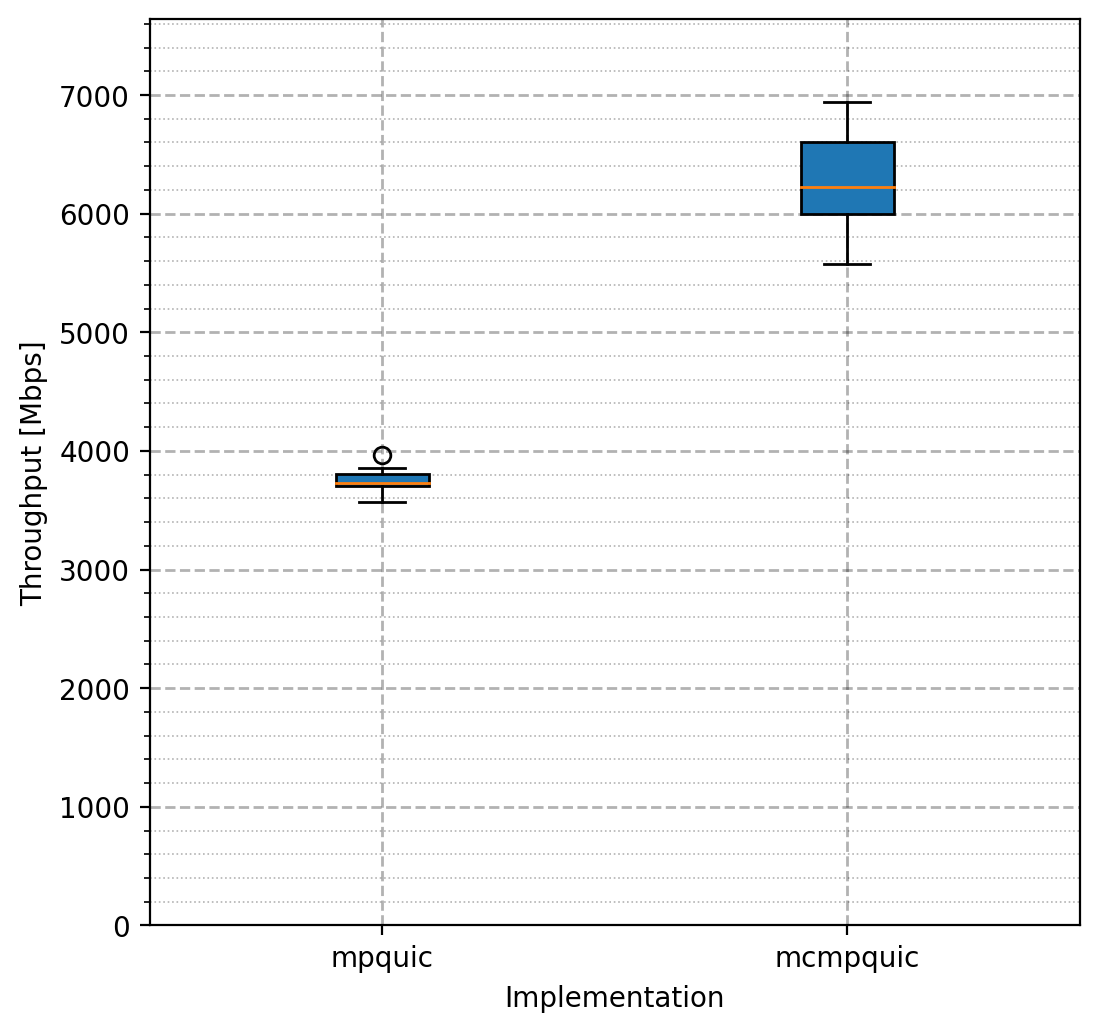

In [99]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(6, 6), dpi=200)
plot_throughput(ax, throughput_df.copy())
plt.show()